# Task 2: Feature Extraction

# ORB Keypoints

Displays all of the keypoints ORB finds

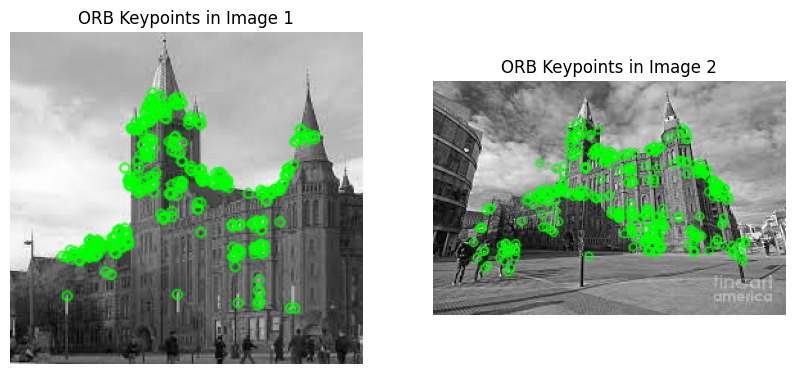

In [ ]:
image1 = cv2.imread('/content/drive/My Drive/Colab Notebooks/victoria1.jpg')
image2 = cv2.imread('/content/drive/My Drive/Colab Notebooks/victoria2.jpg')
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect ORB keypoints and descriptors
keypoints1, descriptors1 = orb.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray_image2, None)

# Draw keypoints on images
image_with_keypoints1 = cv2.drawKeypoints(gray_image1, keypoints1, None, color=(0, 255, 0), flags=0)
image_with_keypoints2 = cv2.drawKeypoints(gray_image2, keypoints2, None, color=(0, 255, 0), flags=0)

plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(image_with_keypoints1, cmap='gray')
plt.title('ORB Keypoints in Image 1'), plt.axis('off')
plt.subplot(122), plt.imshow(image_with_keypoints2, cmap='gray')
plt.title('ORB Keypoints in Image 2'), plt.axis('off')
plt.show()



#  SIFT keypoint matching using Brute-Force Matcher.

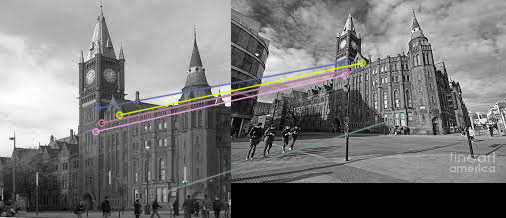

In [ ]:
sift = cv2.SIFT_create()
keypoints1_sift, descriptors1_sift = sift.detectAndCompute(gray_image1, None)
keypoints2_sift, descriptors2_sift = sift.detectAndCompute(gray_image2, None)

# Brute-Force Matcher for SIFT (using L2 norm)
bf_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
matches_sift = bf_sift.knnMatch(descriptors1_sift, descriptors2_sift, k=2)
good_matches_sift = [] # ratio test for SIFT
for m, n in matches_sift:
    if m.distance < 0.75 * n.distance:
        good_matches_sift.append([m])

img_sift_matches = cv2.drawMatchesKnn(gray_image1, keypoints1_sift, gray_image2, keypoints2_sift, good_matches_sift, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(img_sift_matches)

#assisted from chat.openai.com


# ORB Keypoint matches using Brute-Force algorithm

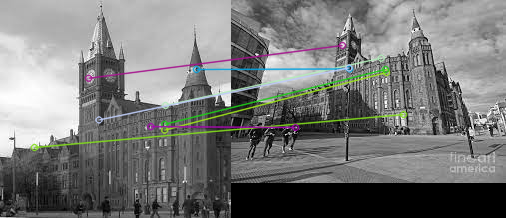

In [ ]:
orb = cv2.ORB_create()
keypoints1_orb, descriptors1_orb = orb.detectAndCompute(gray_image1, None)
keypoints2_orb, descriptors2_orb = orb.detectAndCompute(gray_image2, None)

# Brute-Force Matcher for ORB (using Hamming norm)
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
matches_orb = bf_orb.knnMatch(descriptors1_orb, descriptors2_orb, k=2)
good_matches_orb = [] # ratio test for ORB
for m, n in matches_orb:
    if m.distance < 0.75 * n.distance:
        good_matches_orb.append([m])

img_orb_matches = cv2.drawMatchesKnn(gray_image1, keypoints1_orb, gray_image2, keypoints2_orb, good_matches_orb, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(img_orb_matches)

#assisted from chat.openai.com